In [24]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten
from sklearn.metrics import classification_report

In [2]:
import tensorflow as tf
print(tf.__version__)


2.14.0


In [2]:
# pip install tensorflow



                                              0.0/284.2 MB ? eta -:--:--
                                              0.1/284.2 MB 3.3 MB/s eta 0:01:26
                                              0.3/284.2 MB 4.1 MB/s eta 0:01:10
                                              0.8/284.2 MB 6.6 MB/s eta 0:00:44
                                              1.4/284.2 MB 8.0 MB/s eta 0:00:36
                                              1.5/284.2 MB 8.0 MB/s eta 0:00:36
                                              1.9/284.2 MB 7.2 MB/s eta 0:00:40
                                              3.0/284.2 MB 9.6 MB/s eta 0:00:30
                                              3.4/284.2 MB 9.8 MB/s eta 0:00:29
                                              3.5/284.2 MB 8.5 MB/s eta 0:00:34
                                             4.6/284.2 MB 10.2 MB/s eta 0:00:28
                                             5.2/284.2 MB 10.4 MB/s eta 0:00:27
                                             5

In [4]:
# Load data
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')
X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [5]:
# Reshape data
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Display data shapes
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


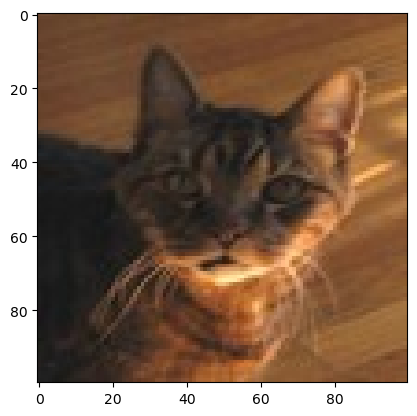

In [13]:
# Display a random image from the test set
idx = random.randint(0, len(X_test))
plt.imshow(X_test[idx, :])
plt.show()

In [14]:
# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [15]:
# Model compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Model training
model.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 [==============================] - 6s 183ms/step - loss: 0.4688 - accuracy: 0.7800
Epoch 2/5
32/32 [==============================] - 6s 184ms/step - loss: 0.3913 - accuracy: 0.8220
Epoch 3/5
32/32 [==============================] - 6s 178ms/step - loss: 0.3326 - accuracy: 0.8560
Epoch 4/5
32/32 [==============================] - 6s 183ms/step - loss: 0.2807 - accuracy: 0.8870
Epoch 5/5
32/32 [==============================] - 6s 183ms/step - loss: 0.2217 - accuracy: 0.9120


In [18]:
# Model evaluation on the test set
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 24ms/step - loss: 0.7206 - accuracy: 0.6800


[0.7205671668052673, 0.6800000071525574]

# Making Predictions

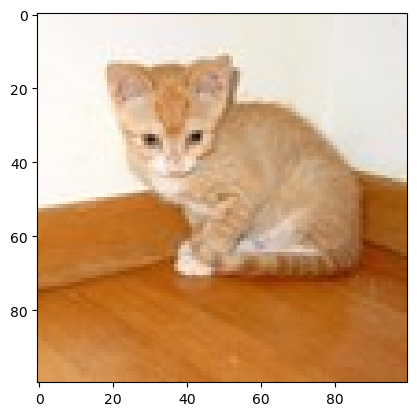

1/1 [==============================] - 0s 30ms/step
Our model says it is: cat


In [22]:
# Display a random image from the test set
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

# Individual prediction
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

# Classify the prediction
if y_pred == 0:
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is:", pred)    

In [25]:
# Classification report
y_pred_all = model.predict(X_test)
y_pred_all = y_pred_all > 0.5

classification_rep = classification_report(Y_test, y_pred_all)
print(classification_rep)

13/13 [==============================] - 0s 24ms/step
              precision    recall  f1-score   support

         0.0       0.66      0.74      0.70       200
         1.0       0.71      0.61      0.66       200

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400

